In [1]:
import numpy as np
from tensorflow import keras
from keras.layers import Input,Dense
from keras.models import Model
from keras.datasets import mnist
import matplotlib.pyplot as plt

In [6]:
encoding_dim = 32
input_img = Input(shape=(784,))

#encoded representation of input images
encoded = Dense(encoding_dim, activation='relu')(input_img)
#print(encoded.shape)


#decoded is the lossy representation of the input
decoded = Dense(784, activation='sigmoid')(encoded)

#this model maps input to its reconstruction
autoencoder = Model(input_img, decoded)

#this model maps input to its encoded representation
encoder = Model(input_img, encoded)

#create a placeholder for an encoded (32-dimensions) input
encoded_input = Input(shape=(encoding_dim,))

#retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]

#create decoder model
decoder = Model(encoded_input, decoder_layer(encoded_input))

autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [7]:
#prepare input data
(x_train, _), (x_test, _) = mnist.load_data()

In [8]:
x_train = x_train/255
x_test = x_test/255

x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

In [11]:
autoencoder.fit(x_train, x_train, 
                epochs = 10, 
                batch_size=256, 
                shuffle=True, 
                validation_data=(x_test, x_test))

Epoch 1/10
235/235 [==============================] - 1s 3ms/step - loss: 0.1455 - val_loss: 0.1344
Epoch 2/10
235/235 [==============================] - 1s 3ms/step - loss: 0.1286 - val_loss: 0.1209
Epoch 3/10
235/235 [==============================] - 1s 3ms/step - loss: 0.1177 - val_loss: 0.1120
Epoch 4/10
235/235 [==============================] - 1s 3ms/step - loss: 0.1105 - val_loss: 0.1063
Epoch 5/10
235/235 [==============================] - 1s 3ms/step - loss: 0.1055 - val_loss: 0.1021
Epoch 6/10
235/235 [==============================] - 1s 3ms/step - loss: 0.1018 - val_loss: 0.0990
Epoch 7/10
235/235 [==============================] - 1s 3ms/step - loss: 0.0992 - val_loss: 0.0967
Epoch 8/10
235/235 [==============================] - 1s 3ms/step - loss: 0.0974 - val_loss: 0.0953
Epoch 9/10
235/235 [==============================] - 1s 3ms/step - loss: 0.0962 - val_loss: 0.0945
Epoch 10/10
235/235 [==============================] - 1s 3ms/step - loss: 0.0954 - val_loss: 0.0938

In [13]:
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

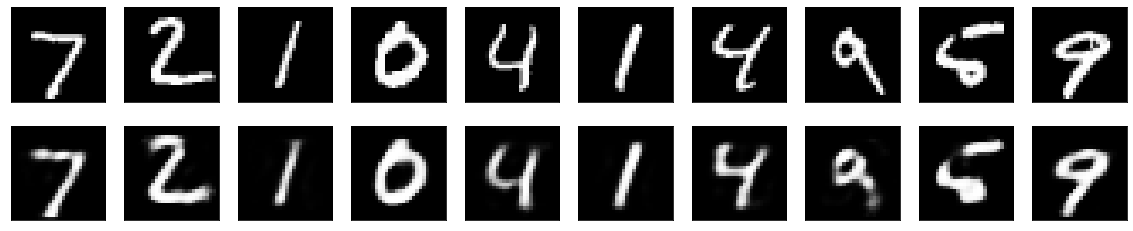

In [15]:
n = 10
plt.figure(figsize=(20,4))
for i in range(n):
  #display original images
  ax = plt.subplot(2, n, i+1)
  plt.imshow(x_test[i].reshape(28,28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  #displaying reconstructed images
  ax = plt.subplot(2, n, i+1 +n)
  plt.imshow(decoded_imgs[i].reshape(28,28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

plt.show()